# Assigment 3: Data Mining In Action

## Initial Data Exploration and PreProcessing

In [21]:
import os
path = os.path.join(os.getcwd(), 'data/')
path = os.path.join(os.getcwd(), 'src/')


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from src.data_preprocessing import load_data, preprocess_data

#TrainAndTestSet
TrainTest_Set = load_data('data/raw/Assignment3-WeatherData.csv')
#Real Datset to be predicted
RealSample = load_data('data/raw/Assignment3-UnknownData.csv')



In [47]:
from src.data_preprocessing import preprocess_data
imputer = 'knn'
X, y, processed_data = preprocess_data(TrainTest_Set, imputer)


TypeError: preprocess_data() takes 1 positional argument but 2 were given

In [28]:
RealSample_Imputed = RealSample.drop(RealSample.columns[0], axis=1)
RealSample_Imputed['RainToday'] = label_encoder.transform(RealSample['RainToday'])
RealSample_Imputed = pd.get_dummies(RealSample_Imputed)
RealSample_Imputed = imputer.fit_transform(RealSample_Imputed)

In [29]:
TrainTest_Set_Imputed = pd.DataFrame(TrainTest_Set_Imputed, columns=TrainTest_Set.columns)

X = TrainTest_Set_Imputed.drop('RainTomorrow', axis=1)
y = TrainTest_Set_Imputed['RainTomorrow']
test_size = 0.2
random_seed = 42

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size, random_state=random_seed)


## Classifiers

In [ ]:
from src.feature_selection import feature_selection



Mutual Information selected 12 features with accuracy: 0.7724
Lasso selected 18 features with accuracy: 0.7733
Random Forest selected 17 features with accuracy: 0.7716
RFE selected 10 features with accuracy: 0.7762
Variance Threshold selected 17 features with accuracy: 0.7716

Feature Selection Comparison:
                    Accuracy
Mutual Information  0.772363
Lasso               0.773340
Random Forest       0.771582
RFE                 0.776172
Variance Threshold  0.771582


<Axes: title={'center': 'Feature Selection Accuracy Comparison'}>

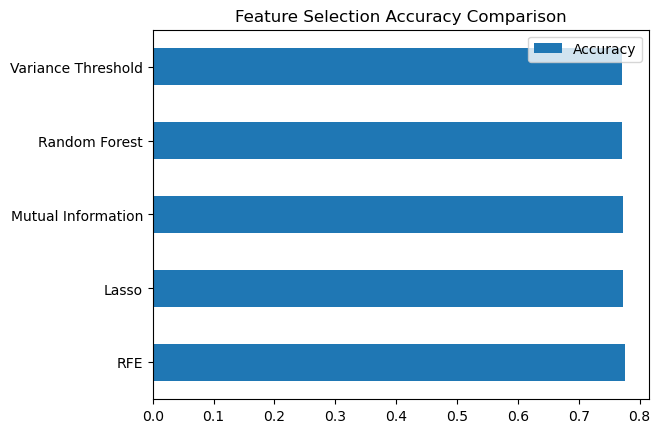

In [94]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE, VarianceThreshold, mutual_info_classif
from sklearn.metrics import accuracy_score

# Assuming X is your feature matrix and y is your target
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize your features (for Lasso and other models that need scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dictionary to store selected features and model performance
feature_selection_results = {}

# 1. Information Gain (Mutual Information)
mi_scores = mutual_info_classif(X_train, y_train)
mi_features = X.columns[mi_scores > 0.01]  # Choose a threshold for mutual information
feature_selection_results['Mutual Information'] = mi_features

# 2. Lasso (L1 Regularization)
lasso = Lasso(alpha=0.01)
lasso.fit(X_train_scaled, y_train)
lasso_features = X.columns[lasso.coef_ != 0]  # Features with non-zero coefficients
feature_selection_results['Lasso'] = lasso_features

# 3. Random Forest Feature Importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_importances = rf.feature_importances_
rf_features = X.columns[rf_importances > 0.01]  # Select top features based on importance threshold
feature_selection_results['Random Forest'] = rf_features

# 4. Recursive Feature Elimination (RFE)
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=10)  # Adjust number of features
rfe.fit(X_train, y_train)
rfe_features = X.columns[rfe.support_]
feature_selection_results['RFE'] = rfe_features

# 5. Variance Threshold
selector = VarianceThreshold(threshold=0.1)
X_var_train = selector.fit_transform(X_train)
var_features = X.columns[selector.get_support()]
feature_selection_results['Variance Threshold'] = var_features

# Function to train a Decision Tree model and evaluate its accuracy
def evaluate_model(features):
    # Train on selected features
    X_train_sel = X_train[features]
    X_test_sel = X_test[features]
    
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train_sel, y_train)
    y_pred = model.predict(X_test_sel)
    
    return accuracy_score(y_test, y_pred)

# Dictionary to store performance scores for each method
performance_results = {}

# Evaluate each feature selection method
for method, selected_features in feature_selection_results.items():
    accuracy = evaluate_model(selected_features)
    performance_results[method] = accuracy
    print(f"{method} selected {len(selected_features)} features with accuracy: {accuracy:.4f}")

# Display performance comparison
performance_df = pd.DataFrame.from_dict(performance_results, orient='index', columns=['Accuracy'])
print("\nFeature Selection Comparison:")
print(performance_df)

# Optional: Sort the results and plot them
performance_df.sort_values(by='Accuracy', ascending=False).plot(kind='barh', title='Feature Selection Accuracy Comparison')


### Decision Tree Classifier

#### Feature Selection

In [ ]:
#determine the mutual information and use this select the best features
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info = pd.DataFrame(mutual_info, index=X_train.columns, columns=['mutual_info'])
mutual_info = mutual_info.sort_values('mutual_info', ascending=False)
mutual_info.head(5)

#### Model Building

In [72]:
#Import the packages required for building a decision tree classifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


model = DecisionTreeClassifier()
model.fit(X_train, y_train)



DecisionTreeClassifier()

#### Model Evaluation

In [73]:
# Import required packages for evaluating a classification model using the test dataset
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc


In [74]:
#predict the class labels for the test set
y_pred = model.predict(X_test)

Accuracy : 0.7794921875
              precision    recall  f1-score   support

         0.0       0.86      0.85      0.86      7916
         1.0       0.51      0.52      0.52      2324

    accuracy                           0.78     10240
   macro avg       0.69      0.69      0.69     10240
weighted avg       0.78      0.78      0.78     10240



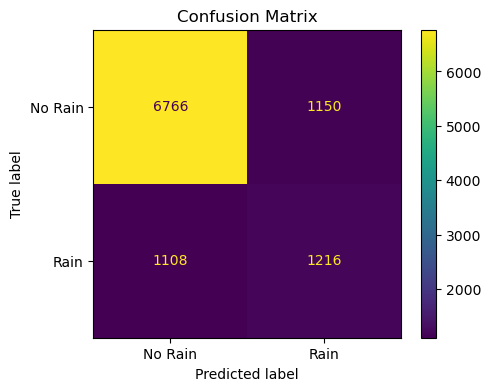

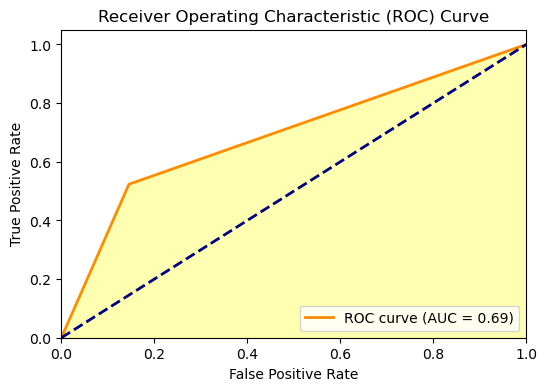

In [75]:
#configure some performance evaluation metrics
def evaluate(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    #Output Results
    print(f'Accuracy : {accuracy}')
    print(class_report)


    cm = confusion_matrix(y_test, y_pred)

    # Create a confusion matrix display
    fig, ax = plt.subplots(figsize=(5, 4), dpi=100)
    cmp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Rain", "Rain"])
    cmp.plot(ax=ax)

    # Set the title
    plt.title('Confusion Matrix')
    return plt.show()

def plot_roc_curve(model, y_test):
    #Define the predicted probabilities
    y_pred_prob = model.predict_proba(X_test)[:,1]
    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    
    # Calculate the AUC (Area Under the Curve)
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve
    plt.figure(figsize=(6, 4), dpi=100)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.fill_between(fpr, tpr, color='yellow', alpha=0.3)

    # Plot a diagonal line (chance curve)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    
    # Labels and title
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()




evaluate(y_test, y_pred)
plot_roc_curve(model, y_test)


In [76]:
def create_submission(model, classifier_name):
    Real_Pred = model.predict(RealSample_Imputed)
    Real_Pred = pd.DataFrame(Real_Pred)
    Row_ID = RealSample['row ID']
    Real_Pred.columns = ['Predict_RainTomorrow']
    Real_Pred = pd.concat([Row_ID, Real_Pred], axis=1)
    
    # Create the CSV filename using the classifier_name
    filename = f"{classifier_name}_submission.csv"
    
    # Save the DataFrame to a CSV file with the created filename
    Real_Pred.to_csv(filename, index=False)
    
    return Real_Pred



In [77]:
create_submission(model, 'DecisionTree')


c:\Users\61422\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


,row ID,Predict_RainTomorrow
0,Row0,0.0
1,Row1,0.0
2,Row2,0.0
3,Row3,0.0
4,Row4,0.0
...,...,...
9960,Row9960,0.0
9961,Row9961,0.0
9962,Row9962,0.0
9963,Row9963,0.0


### K Nearest Neighbour

In [78]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)


KNeighborsClassifier()

In [79]:
y_pred= knn_model.predict(X_test)

Accuracy : 0.83349609375
              precision    recall  f1-score   support

         0.0       0.86      0.93      0.90      7916
         1.0       0.68      0.50      0.57      2324

    accuracy                           0.83     10240
   macro avg       0.77      0.71      0.74     10240
weighted avg       0.82      0.83      0.82     10240



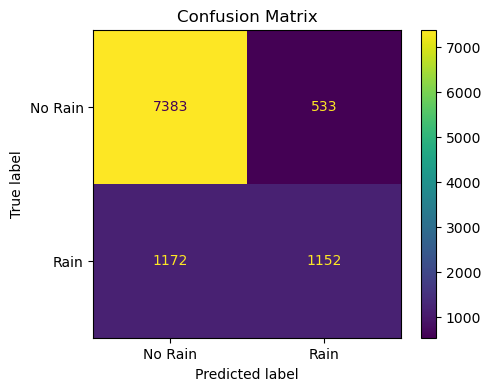

In [80]:
evaluate(y_test, y_pred)

In [81]:
create_submission(knn_model, 'KNN')

c:\Users\61422\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


,row ID,Predict_RainTomorrow
0,Row0,0.0
1,Row1,0.0
2,Row2,0.0
3,Row3,0.0
4,Row4,0.0
...,...,...
9960,Row9960,0.0
9961,Row9961,0.0
9962,Row9962,0.0
9963,Row9963,0.0


### Random Forest

In [82]:
from sklearn.ensemble import RandomForestClassifier

forrest_model = RandomForestClassifier(n_estimators=100, random_state=42)

forrest_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [83]:
y_pred= forrest_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

Accuracy : 0.84296875
              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90      7916
         1.0       0.74      0.48      0.58      2324

    accuracy                           0.84     10240
   macro avg       0.80      0.71      0.74     10240
weighted avg       0.83      0.84      0.83     10240



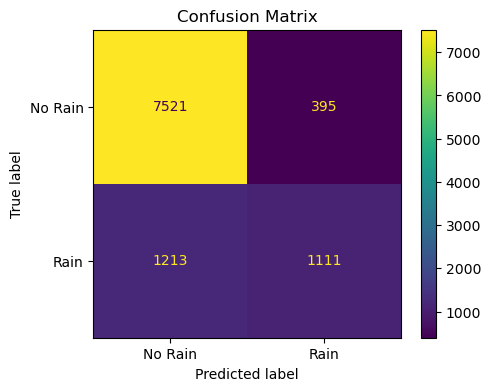

In [84]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

#Output Results
print(f'Accuracy : {accuracy}')
print(class_report)


cm = confusion_matrix(y_test, y_pred)

# Create a confusion matrix display
fig, ax = plt.subplots(figsize=(5, 4), dpi=100)
cmp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Rain", "Rain"])
cmp.plot(ax=ax)

# Set the title
plt.title('Confusion Matrix')
plt.show()


In [85]:
create_submission(forrest_model, 'RandomForest')

c:\Users\61422\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


,row ID,Predict_RainTomorrow
0,Row0,0.0
1,Row1,0.0
2,Row2,0.0
3,Row3,0.0
4,Row4,0.0
...,...,...
9960,Row9960,0.0
9961,Row9961,0.0
9962,Row9962,0.0
9963,Row9963,0.0


### Support Vector Machine

Accuracy : 0.84462890625
              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90      7916
         1.0       0.72      0.51      0.60      2324

    accuracy                           0.84     10240
   macro avg       0.80      0.73      0.75     10240
weighted avg       0.84      0.84      0.83     10240



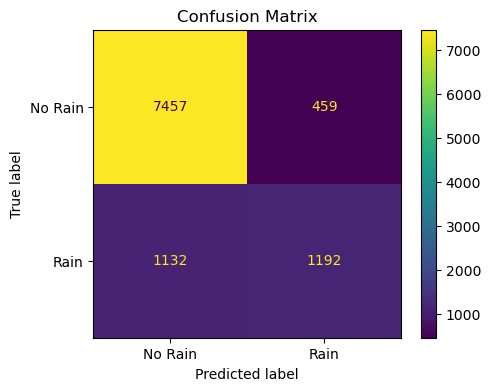

In [86]:
from sklearn import svm

model = svm.SVC(kernel='linear', C=1, random_state=42)
model.fit(X_train, y_train)
y_pred= model.predict(X_test)
evaluate(y_test, y_pred)


In [87]:
create_submission(model, 'SVM')

c:\Users\61422\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


,row ID,Predict_RainTomorrow
0,Row0,0.0
1,Row1,0.0
2,Row2,0.0
3,Row3,0.0
4,Row4,0.0
...,...,...
9960,Row9960,0.0
9961,Row9961,0.0
9962,Row9962,0.0
9963,Row9963,0.0


### Neural Network

Accuracy : 0.81591796875
              precision    recall  f1-score   support

         0.0       0.90      0.86      0.88      7916
         1.0       0.58      0.67      0.62      2324

    accuracy                           0.82     10240
   macro avg       0.74      0.77      0.75     10240
weighted avg       0.83      0.82      0.82     10240



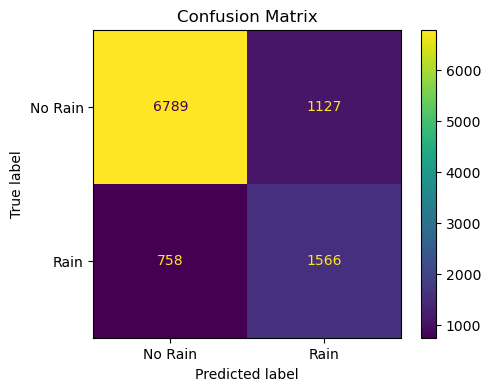

In [88]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=500, random_state=42)
model.fit(X_train, y_train)
y_pred= model.predict(X_test)
evaluate(y_test, y_pred)